Let's try plotting some of the data we recorded from our Pokemon snake game last week!

Import libraries and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

plt.style.use('seaborn-ticks')

# This is some sample data, but you can upload your own instead if you like!
game_data = pd.read_csv("./Pokemon Game Data/1552513645.59.csv")

Let's see what our data looks like!

In [3]:
game_data.head()

,Unnamed: 0,Event,Time,X,Y
0,0,Jigglypuff,1.552514e+09,11,4
1,1,Poliwhirl,1.552514e+09,7,5
2,2,Nidorina,1.552514e+09,4,9
3,3,Pikachu,1.552514e+09,6,14
4,4,Spearow,1.552514e+09,10,14


One thing that's really easy to do with pandas is to pull out all the rows where a certain condition is true.

First we check whether the column "Event" matches a certain Pokemen. Let's use Jigglypuff as an example:

In [4]:
pokemon = 'Jigglypuff'
game_data.Event == pokemon

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
53     True
54    False
55    False
56    False
57    False
58    False
59    False
60     True
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75     True
76    False
77    False
78    False
79     True
80    False
81    False
82     True
Name: Event, dtype: bool

That gives us "True" for all the Jigglypuff entries, and "False" for everything else. Now let's use that list of Trues and Falses to select the data we want:

In [5]:
game_data[game_data.Event == pokemon]

,Unnamed: 0,Event,Time,X,Y
0,0,Jigglypuff,1.552514e+09,11,4
10,10,Jigglypuff,1.552514e+09,6,2
13,13,Jigglypuff,1.552514e+09,13,7
20,20,Jigglypuff,1.552514e+09,15,10
31,31,Jigglypuff,1.552514e+09,8,2
36,36,Jigglypuff,1.552514e+09,2,5
37,37,Jigglypuff,1.552514e+09,2,6
44,44,Jigglypuff,1.552514e+09,4,10
53,53,Jigglypuff,1.552514e+09,4,10
60,60,Jigglypuff,1.552514e+09,14,19


# Pokemon counts over time

We recorded our game data in terms of "events," but we want a count of how many of each Pokemon type we have over time. For each Pokemon type, we need to count up the number of times we caught that Pokemon (also called the <b>cumulative sum</b>). That way, we can tell you for any given moment in time how many Jigglypuffs we have, for example.

In [6]:
for pokemon in set(game_data.Event):
    game_data[pokemon] = (game_data.Event == pokemon).cumsum()

Now we can see at each time point how many of each Pokemon we have:

In [7]:
game_data.head()

,Unnamed: 0,Event,Time,X,Y,Poliwhirl,Spearow,Pikachu,Nidorina,Jigglypuff
0,0,Jigglypuff,1.552514e+09,11,4,0,0,0,0,1
1,1,Poliwhirl,1.552514e+09,7,5,1,0,0,0,1
2,2,Nidorina,1.552514e+09,4,9,1,0,0,1,1
3,3,Pikachu,1.552514e+09,6,14,1,0,1,1,1
4,4,Spearow,1.552514e+09,10,14,1,1,1,1,1


And we can make a plot!

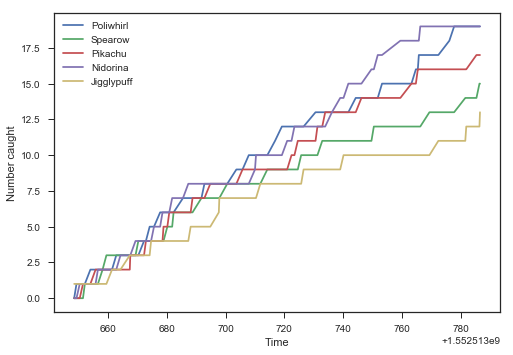

In [8]:
for pokemon in set(game_data.Event):
    plt.plot(game_data.Time, game_data[pokemon], label = pokemon)
plt.xlabel('Time')
plt.ylabel('Number caught')
plt.legend()
plt.show()

# Plotting Pokemon positions

We also recorded the X and Y positions where we caught each Pokemon. Let's plot them to see if there are any patterns to where the different types show up.

For this, maybe we want to merge together a few dataframes from different games we've played. To do that, we'll first load all our files into a list, and then use the function "concat" to mush them together.

In [9]:
file_path = "./Pokemon Game Data/"
files = []
for f in os.listdir(file_path):
    df = pd.read_csv(file_path + f)
    files.append(df)

game_data = pd.concat(files)

First of all, we want to pull out just the events where we caught a particular type of Pokemon. Let's use Jigglypuff again.

In [10]:
pokemon = 'Jigglypuff'
subset = game_data[game_data.Event == pokemon].copy()

Now, we can make an array the same size as the screen we were playing on earlier, and fill in each position according to how many times its position shows up in our dataframe.

In [11]:
screen = np.zeros((19, 19))

for x in range(19):
    for y in range(19):
        screen[y, x] = subset[(subset.X == x + 1) & (subset.Y == y + 1)].shape[0]

We can easily plot the array we just made as a heatmap.

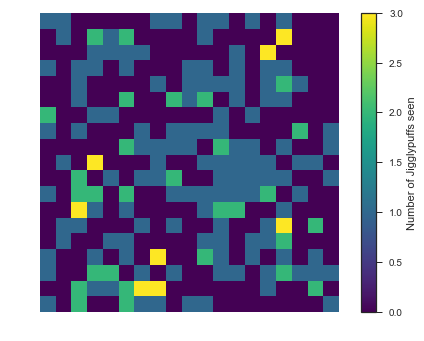

In [12]:
plt.imshow(screen, cmap = 'viridis', origin = 'lower')
c = plt.colorbar()
c.set_label('Number of ' + pokemon + 's seen')
plt.axis('off')
plt.show()

Do any of the Pokemon tend to show up in only some places? (Hint: why would we ask if they didn't?)

Let's see a couple more types of Seaborn plot!

One type of plot is the violin plot, which shows you the distribution of some data points, split by category. In this example, the data points are the X coordinates of the Pokemon, and the categories are the type of Pokemon. You can see from this that a couple of them have different distributions than the others.

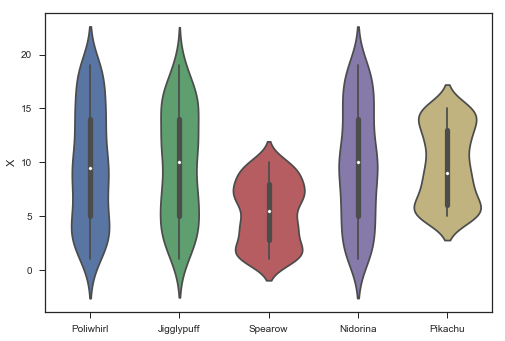

In [13]:
sns.violinplot(x = 'Event', y = 'X', data = game_data)
plt.gca().set_xlabel('')
plt.show()

The KDE plot is similar to the violin plot in that it tries to show the distribution of your data, but you can plot in 2 dimensions instead of 1. This gives us something that looks a bit like the heatmap from before, but we can plot two on top of each other to compare the "habitats" of two Pokemon.

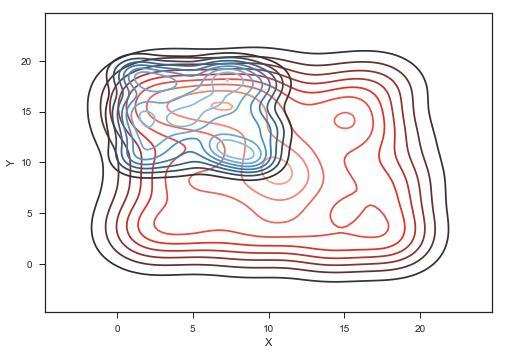

In [14]:
subset = game_data[game_data.Event == 'Spearow'].copy()
subset2 = game_data[game_data.Event == 'Nidorina'].copy()

sns.kdeplot(subset2.X, subset2.Y, cmap = 'Reds_d')
sns.kdeplot(subset.X, subset.Y, cmap = 'Blues_d')
plt.show()

# What other data could you plot?

- Instead of plotting the positions of the Pokemon, you could ask how much time the player spends in different parts of the screen (you would have to change your Trinket game to record this extra type of data as well).
- Plot your score over time versus a friend's score over time.

What other ideas can you think of?

You can find more examples using Seaborn [here](https://seaborn.pydata.org/examples/index.html).